#### Assignment 

In [2]:
import pandas as pd


In [3]:
probs = pd.read_csv('probs.csv')

In [4]:
truths = pd.read_csv('truths.csv')

In [5]:
probs.head()

,Instance,estimated pop
0,0,0.058539
1,1,0.081055
2,2,0.050623
3,3,0.069877
4,4,0.039935


In [6]:
truths.head()

,Instance,purchased
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [7]:
probs_truth = pd.merge(probs, truths, on='Instance')



In [8]:
probs_truth.head()

,Instance,estimated pop,purchased
0,0,0.058539,1
1,1,0.081055,0
2,2,0.050623,0
3,3,0.069877,0
4,4,0.039935,0


In [9]:
probs_truth['prob_estimate_binned'] = pd.cut(probs_truth['estimated pop'],10)

In [10]:
probs_truth['prob_estimate_binned']

0        (-0.000698, 0.0698]
1             (0.0698, 0.14]
2        (-0.000698, 0.0698]
3             (0.0698, 0.14]
4        (-0.000698, 0.0698]
5        (-0.000698, 0.0698]
6        (-0.000698, 0.0698]
7        (-0.000698, 0.0698]
8        (-0.000698, 0.0698]
9        (-0.000698, 0.0698]
10            (0.0698, 0.14]
11       (-0.000698, 0.0698]
12       (-0.000698, 0.0698]
13       (-0.000698, 0.0698]
14       (-0.000698, 0.0698]
15       (-0.000698, 0.0698]
16       (-0.000698, 0.0698]
17            (0.0698, 0.14]
18       (-0.000698, 0.0698]
19       (-0.000698, 0.0698]
20       (-0.000698, 0.0698]
21       (-0.000698, 0.0698]
22       (-0.000698, 0.0698]
23       (-0.000698, 0.0698]
24       (-0.000698, 0.0698]
25       (-0.000698, 0.0698]
26       (-0.000698, 0.0698]
27       (-0.000698, 0.0698]
28       (-0.000698, 0.0698]
29            (0.0698, 0.14]
                ...         
47914    (-0.000698, 0.0698]
47915    (-0.000698, 0.0698]
47916    (-0.000698, 0.0698]
47917    (-0.0

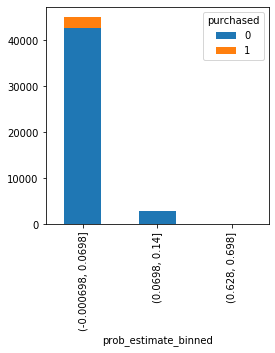

In [27]:
import matplotlib.pyplot as plt
table = pd.crosstab(probs_truth['prob_estimate_binned'],probs_truth['purchased'])
table.plot(kind='bar', stacked=True,figsize=(4,4))
plt.show()

In [29]:
probs_truth['prob_estimate_binned'].value_counts()

(-0.000698, 0.0698]    44994
(0.0698, 0.14]          2949
(0.628, 0.698]             1
(0.559, 0.628]             0
(0.489, 0.559]             0
(0.419, 0.489]             0
(0.349, 0.419]             0
(0.279, 0.349]             0
(0.209, 0.279]             0
(0.14, 0.209]              0
Name: prob_estimate_binned, dtype: int64

In [12]:
table

purchased,0,1
prob_estimate_binned,,
"(-0.000698, 0.0698]",42730,2264
"(0.0698, 0.14]",2818,131
"(0.628, 0.698]",1,0


In [13]:
probs_truth.head(30)

,Instance,estimated pop,purchased,prob_estimate_binned
0,0,0.058539,1,"(-0.000698, 0.0698]"
1,1,0.081055,0,"(0.0698, 0.14]"
2,2,0.050623,0,"(-0.000698, 0.0698]"
3,3,0.069877,0,"(0.0698, 0.14]"
4,4,0.039935,0,"(-0.000698, 0.0698]"
5,5,0.044346,0,"(-0.000698, 0.0698]"
6,6,0.038370,0,"(-0.000698, 0.0698]"
7,7,0.045456,0,"(-0.000698, 0.0698]"
8,8,0.043330,0,"(-0.000698, 0.0698]"
9,9,0.051702,0,"(-0.000698, 0.0698]"


In [14]:
probs_point_five = probs_truth[probs_truth['estimated pop'] > 0.5]

In [15]:
probs_point_five

,Instance,estimated pop,purchased,prob_estimate_binned
6935,6935,0.698223,0,"(0.628, 0.698]"


### for threshold of  > 0.5

coverting purchases of greater than 0.5 to 1 and less than 0.5 coverted to 0

In [16]:
probs_truth['greater_than_0.5'] = probs_truth['estimated pop'].apply(lambda x: 1 if x > 0.5 else 0)
probs_truth['greater_than_0.05'] = probs_truth['estimated pop'].apply(lambda x: 1 if x > 0.05 else 0)

In [17]:
probs_truth.head()

,Instance,estimated pop,purchased,prob_estimate_binned,greater_than_0.5,greater_than_0.05
0,0,0.058539,1,"(-0.000698, 0.0698]",0,1
1,1,0.081055,0,"(0.0698, 0.14]",0,1
2,2,0.050623,0,"(-0.000698, 0.0698]",0,1
3,3,0.069877,0,"(0.0698, 0.14]",0,1
4,4,0.039935,0,"(-0.000698, 0.0698]",0,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [19]:
Y_test = probs_truth['purchased']
Y_pred = probs_truth['greater_than_0.5']



In [21]:
Y_pred.value_counts()

0    47943
1        1
Name: greater_than_0.5, dtype: int64

#### WITH A THRESHOLD OF >0.5 THE CONFUSION MATRIX WILL BE 

In [22]:
matrix = confusion_matrix(Y_test,Y_pred)

In [23]:
print(matrix)

[[45548     1]
 [ 2395     0]]


In [24]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     45549
           1       0.00      0.00      0.00      2395

    accuracy                           0.95     47944
   macro avg       0.48      0.50      0.49     47944
weighted avg       0.90      0.95      0.93     47944



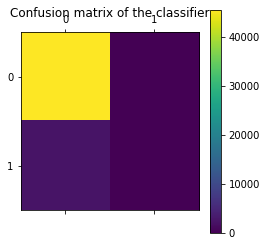

In [25]:
import pylab as pl
pl.matshow(matrix)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()


### CONFUSION MATRIX AND CLASSIFICATION REPORT FOR Threshold > 0.05

In [26]:
Y_test_small = probs_truth['purchased']
Y_pred_small = probs_truth['greater_than_0.05']
matrix_small = confusion_matrix(Y_test_small,Y_pred_small)
report = classification_report(Y_test_small, Y_pred_small)
print(matrix_small)
print(report)

[[22365 23184]
 [ 1174  1221]]
              precision    recall  f1-score   support

           0       0.95      0.49      0.65     45549
           1       0.05      0.51      0.09      2395

    accuracy                           0.49     47944
   macro avg       0.50      0.50      0.37     47944
weighted avg       0.91      0.49      0.62     47944

